# Jupyter-Notebook zu:

## “Ein Vergleich zwischen Random Forest und Gradient Boosting als geeignetes Prognoseverfahren anhand von Immoblilienwerten in Boston.” 

### by Christian Loor 

Hier wird der verwendete Code dokumentiert. Das zugehörige Abbildungs- Tabellen - und Literaturverzeichnis kann aus dem Original entnommen werden.


### Step0: Boston Housing Data

Boston Housing Data stammt aus dem StatLib-Archiv und besschreibt anhand von 506 Beobachtungen Informationen über Wohnverhältnisse in der Gegend von Boston. In der Literatur findet dieser Datensatz breite Anwendung, um Algorithmen zu evaluieren (Harrison & Rubinfeld, 1978; The University of Toronto, 1996).

### Step1 : Load data 

Zunächst wird der Datensatz geladen. Die Beschreibung der Variablen wurde nochmal hier reinkopiert (vgl. Tabelle 1).

- CRIM:	Pro-Kopf-Verbrechensrate nach Stadt
- ZN	Anteil der Wohnbauflächen, die für Grundstücke mit einer Größe von mehr als 25.000 Quadratmetern ausgewiesen sind
- INDUS	Anteil der Flächen für Nicht-Einzelhandelsunternehmen je Stadt
- CHAS	Charles River Dummy-Variable (= 1, wenn der Trakt an den Fluss grenzt, sonst 0)
- NOX	Stickstoffoxidkonzentration (Teile pro 10 Millionen)
- RM	durchschnittliche Anzahl der Zimmer pro Wohnung
- AGE	Anteil der Eigentumswohnungen, die vor 1940 gebaut wurden
- DIS	gewichtete Entfernungen zu fünf Bostoner Beschäftigungszentren
- RAD	Index der Erreichbarkeit von Radialautobahnen
- TAX	Vollwertiger Grundsteuersatz pro 10.000 Dollar
- PTRATIO	Schüler-Lehrer-Verhältnis nach Stadt
- B	Anteil der Schwarzen in der Population
- LSTAT	% unterer Status der Bevölkerung
- MEDV	Medianwert von Eigenheimen in $1000s


In [1]:
# import required librarys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import load_boston
warnings.filterwarnings('ignore')

In [2]:
#load local stored dataset 
df=pd.read_csv("C:/Users/Lenovo/Desktop/Meine Dateien/Management/SeminarI_Wifo/Python/housing.csv",header=None,sep='\s+')
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [3]:
#Rename columns
df.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
#show bottom of the original data
print(df.tail())

        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  


In [5]:
#check for NA-Values 
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Es wurden keine Na bzw. NaN im Datensatz gefunden. Somit ist der Datensatz bereit für den nächsten Schritt.

### Step2: Deskriptive Statistiken

Nun soll die Variablen näher untersucht werden, um diese für das Training vorbereiten zu können.

In [6]:
#general information regarding data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
#summarize statistics about the data set 
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Für Variable Nummer 14 lassen sich Auffälligkeiten feststellen. So wurden in 16 Fällen ein Medianwert von genau 50.000$ ermittelt. Daher könnten die Werte ab 50.000$ zensiert worden sein, auch wenn im Originalpaper dazu keine Angabe gemacht wurde (The University of Toronto, 1996)

- Diese Aussage wird nun näher untersucht:


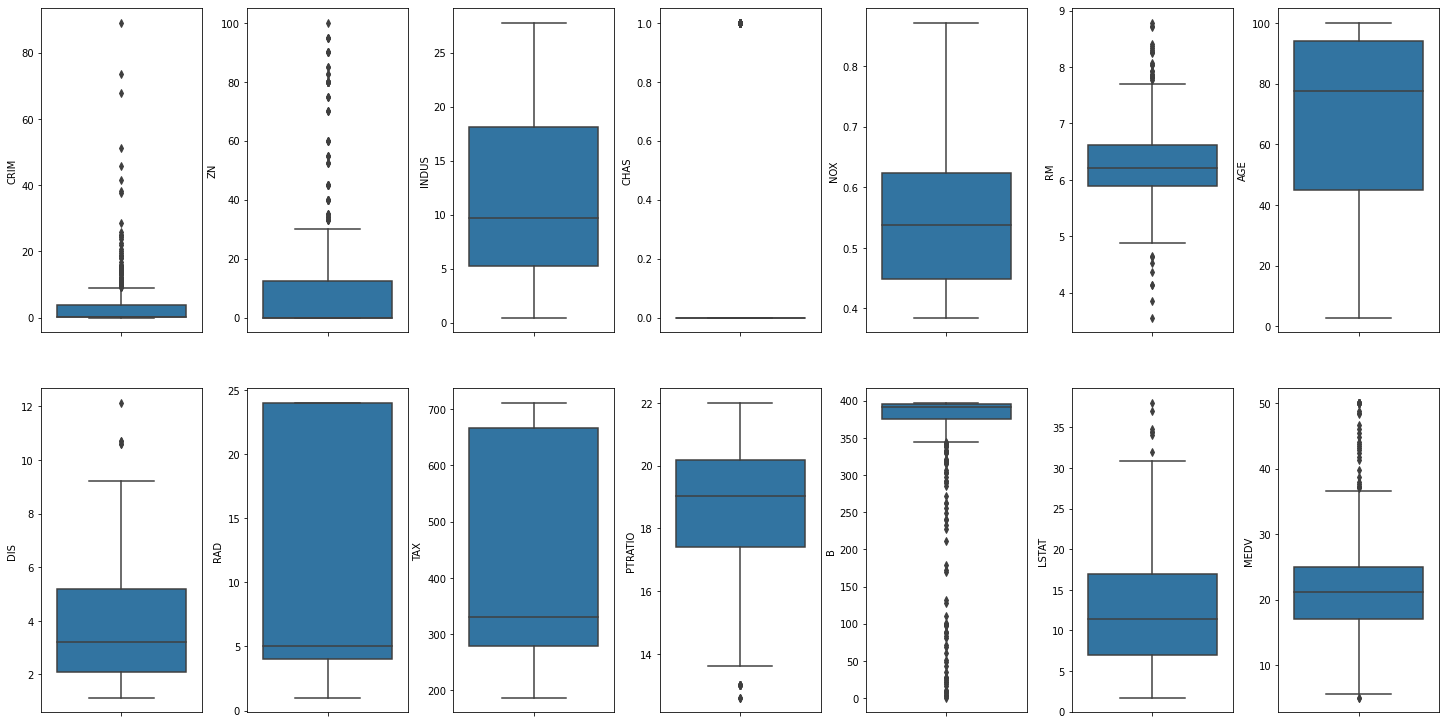

In [8]:
#print boxplot for each variable
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Spalten wie CRIM, ZN, RM, B scheinen Ausreißer zu haben. Dazu wird der Prozentsatz der Ausreißer in jeder Spalte betrachtet:

In [9]:
for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


Es wird die Entscheidung getroffen, Werte mit einem Median > 50.000$ auszuschließen:

In [10]:
#remove MEDV outliers
df = df[~(df['MEDV'] >= 50.0)]
print(np.shape(df))

(490, 14)


Nun wird  die Verteilung der übrigen Variablen betrachtet

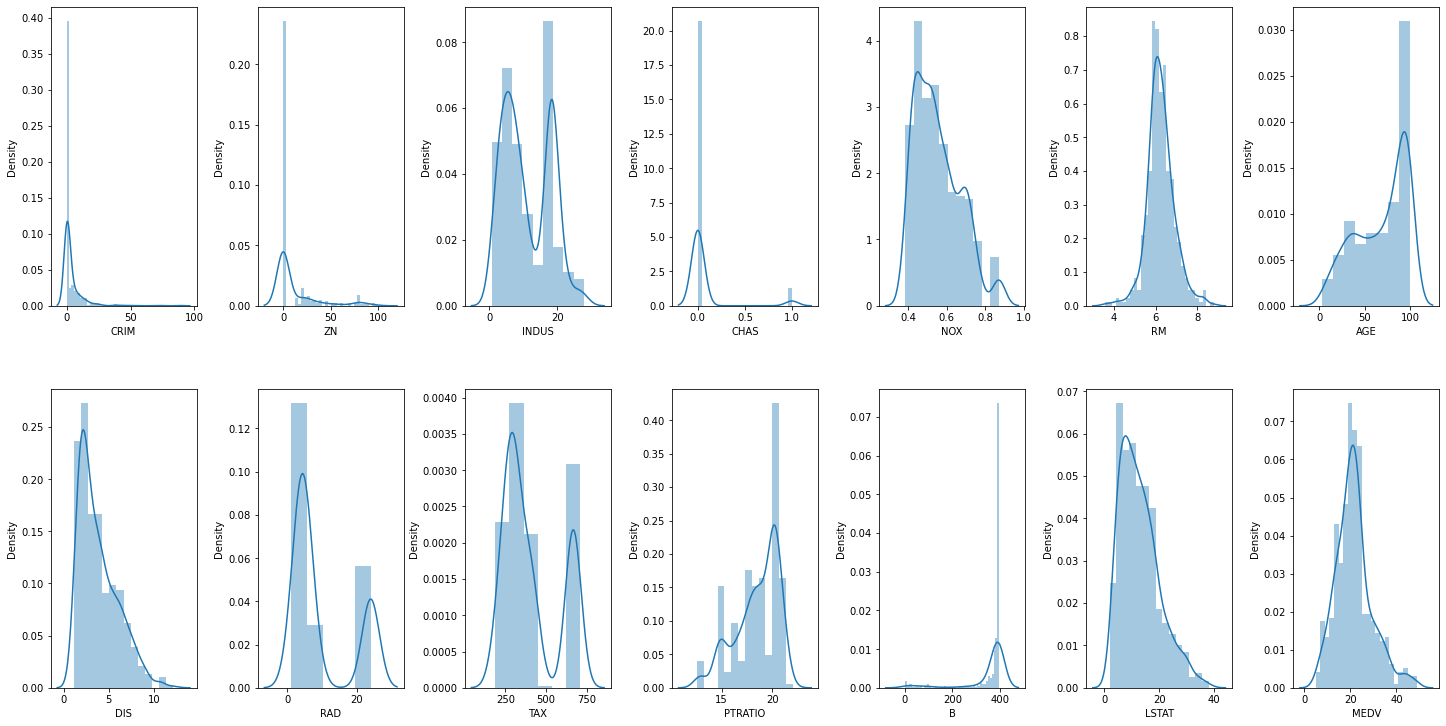

In [11]:
#print distributions
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Verteilungen zeigen das Verhalten einer Normalverteilung. 

In [12]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000
mean,3.643241,11.112245,11.113143,0.059184,0.554307,6.245471,68.27898,3.834519,9.514286,408.002041,18.520000,355.855449,12.92402,21.635918
std,8.722154,22.844626,6.821302,0.236209,0.116688,0.653147,28.16479,2.109948,8.691297,168.065190,2.110478,92.634273,7.08318,7.865301
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.90000,1.137000,1.000000,187.000000,12.600000,0.320000,1.98000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.881000,44.55000,2.111050,4.000000,280.250000,17.400000,375.912500,7.34750,16.700000
50%,0.247510,0.000000,9.690000,0.000000,0.538000,6.185000,76.80000,3.275900,5.000000,330.000000,19.100000,391.770000,11.67500,20.900000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.578000,93.87500,5.214600,24.000000,666.000000,20.200000,396.322500,17.11750,24.675000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.00000,12.126500,24.000000,711.000000,22.000000,396.900000,37.97000,48.800000


Die verwendeten Modelle sollen nicht alle Variablen berücksichtigen, sondern nur diejenigen, die einen signifikanten Beitrag zum Erklärungsgehalt beitragen. Um dies besser beurteilen zu können, kann folgende Korrelationsmatrix betrachtet werden:

<AxesSubplot:>

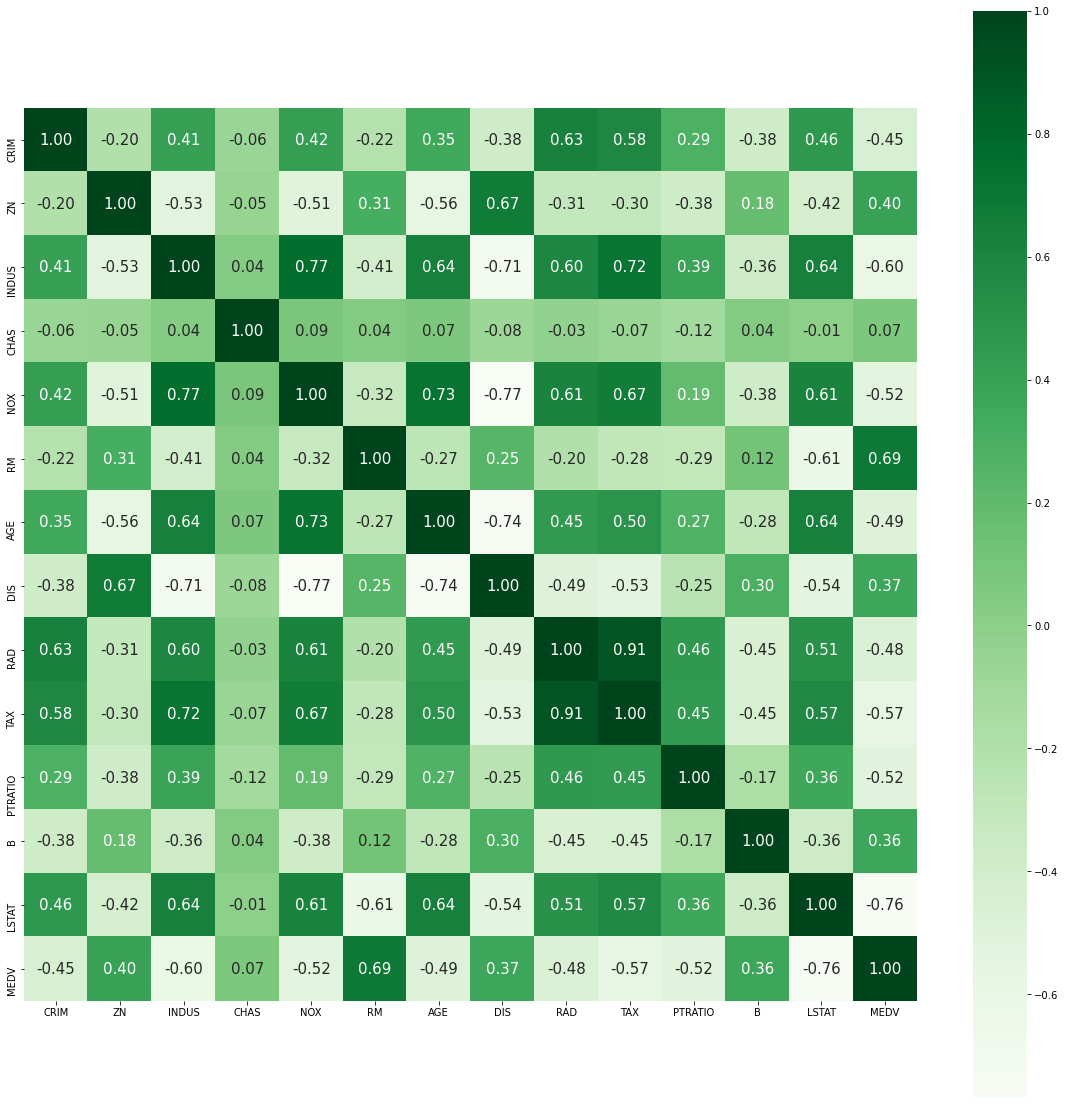

In [13]:
#compute correlations
corr = df.corr()
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Greens')

Anhand der Korrelationsmatrix werden alle Prädikatoren übernommen, die eine Korrelation >=0.5 aufweisen. Also INDUS, NOX, RM, TAX, PTRATIO, LSTAT. Zum anderen werden RAD und AGE in das Modell miteinbezogen, da das Alter einer Wohnung und die Nähe zu Autobahnen sinnvolle Prädikatoren für den Wert einer Immobilie darstellen. 

Skalieren der Spalten auf eine standardisierte Normalverteilung. Durch die Normalisierung soll erreicht werden, dass alle verwendeten Attribute für die Modelle den gleichen Stellenwert einnehmen, indem die unabhängigen Variablen gleich gewichtet werden (G et al., 2020)

In [14]:
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler()
column_selected = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
X = df.loc[:,column_selected]
Y = df['MEDV']
X = pd.DataFrame(data=standard_scaler.fit_transform(X), columns=column_selected)

In [15]:
X.describe()

,LSTAT,INDUS,NOX,PTRATIO,RM,TAX,DIS,AGE
count,4.900000e+02,4.900000e+02,4.900000e+02,4.900000e+02,4.900000e+02,4.900000e+02,4.900000e+02,4.900000e+02
mean,3.375984e-17,6.598463e-16,6.420035e-16,2.646409e-16,2.246502e-16,9.538855e-16,-1.783154e-16,1.895309e-16
std,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00
min,-1.546651e+00,-1.522252e+00,-1.452426e+00,-2.807918e+00,-4.114256e+00,-1.316322e+00,-1.279783e+00,-2.323674e+00
25%,-7.880951e-01,-8.692176e-01,-9.033934e-01,-5.312277e-01,-5.585936e-01,-7.609107e-01,-8.176648e-01,-8.433661e-01
50%,-1.765163e-01,-2.088454e-01,-1.398948e-01,2.751001e-01,-9.267930e-02,-4.645921e-01,-2.650254e-01,3.028508e-01
75%,5.926385e-01,1.025317e+00,5.978679e-01,7.968416e-01,5.096376e-01,1.536675e+00,6.547516e-01,9.097238e-01
max,3.539593e+00,2.439981e+00,2.716791e+00,1.650600e+00,3.884451e+00,1.804702e+00,3.933963e+00,1.127416e+00


In [16]:
Y.describe()

count    490.000000
mean      21.635918
std        7.865301
min        5.000000
25%       16.700000
50%       20.900000
75%       24.675000
max       48.800000
Name: MEDV, dtype: float64

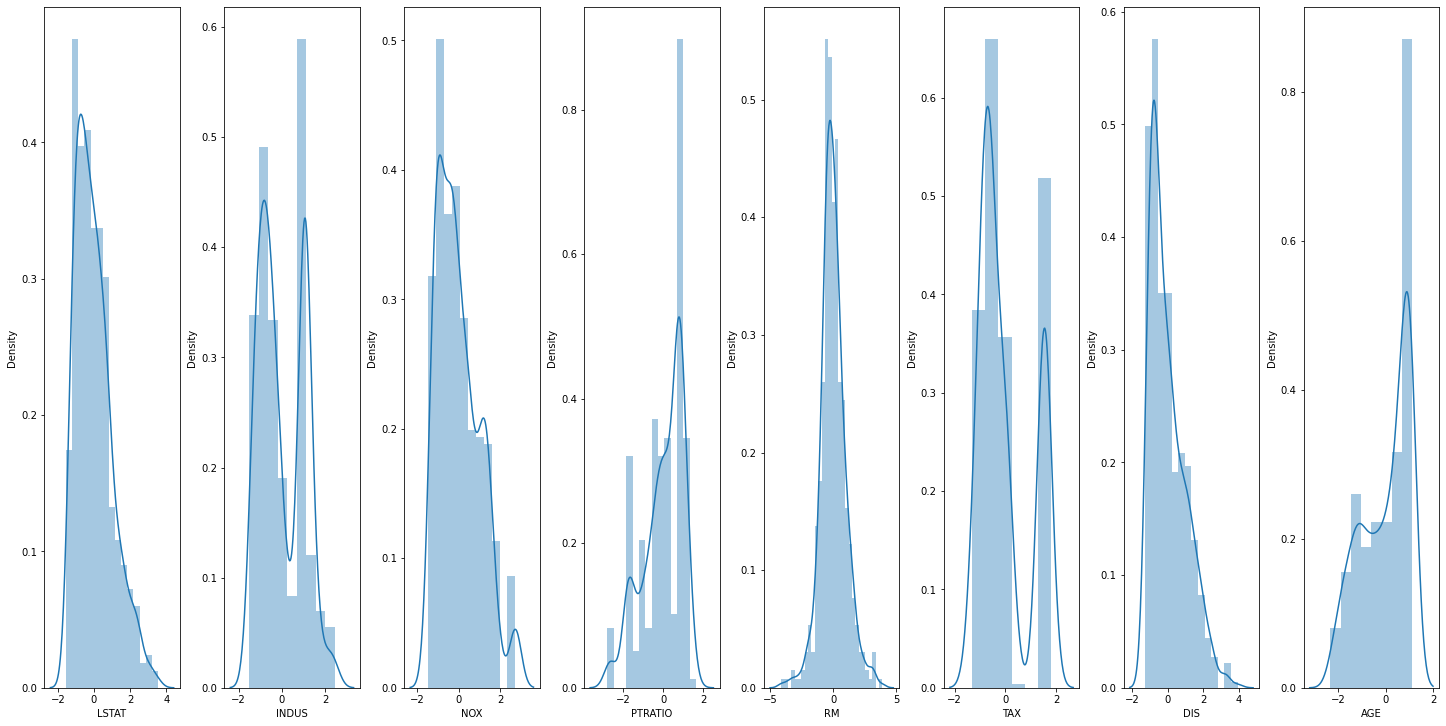

In [18]:
#distribution of the data are maintained
fig, axs = plt.subplots(ncols=8, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in X.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Beobachtung: Die Werte wurden zwar herunterskaliert, die Verteilungen der Variablen sind aber erhalten geblieben.

Nun können die Trainings- und Testdaten erzeugt werden: 

In [19]:
#Split the Dataset into Training and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state= 0)


In [20]:
#Show propartions of the splitted datasets 

for k in [X_train, X_test, y_train, y_test]: 
 print(k.shape)
 

(367, 8)
(123, 8)
(367,)
(123,)


 ## Random Forests
 
Dokumentation der RandomForestRegression kann hier gefunden werden:

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

### Step 3: Start Training with RF

Im dritte Schritt wird mithilfe der Gittersuche (GridSearchCV) die Kombinationen ermittelt, mit der sich das höchste R2 erzielen lässt. Parameterauswahl ist durch vorangegagnenen Ausarbeitungen getroffen worden (Yoon, 2021; Callens, 2020). Eine Dokumentation zur GridSearchCV wird hier gezeigt: 

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [21]:
#Import the Random Forest Regressor 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
 
#Create a Random Forest regressor object from Random Forest Regressor class
RF_param =dict(
    max_depth = [2,4,6,8,10,12,14,16,18,20],
    n_estimators = [100, 200 ,500, 900, 1000],
    min_samples_leaf = [2,4,6,8,10]
    )

#Use Grid Search for optimizing hyper parameters 
RF_grid = GridSearchCV(estimator= RandomForestRegressor(), param_grid=RF_param, scoring="r2", n_jobs=-1) 
RF_grid.fit(X_train , y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'n_estimators': [100, 200, 500, 900, 1000]},
             scoring='r2')

In [22]:
# print the parameters withh the highscore 
print("Best Parameters for RF: ")
print(RF_grid.best_params_)
print("Best Estimator for RF: ")
print(RF_grid.best_estimator_)
print("Best Score for RF: ", RF_grid.best_score_)


Best Parameters for gb: 
{'max_depth': 12, 'min_samples_leaf': 2, 'n_estimators': 1000}
Best Estimator for RF: 
RandomForestRegressor(max_depth=12, min_samples_leaf=2, n_estimators=1000)
Best Score for RF:  0.8457422723877391


Bemerkung: Es ist kein random state gesetzt, womit bei Wiederholungen eine andere Kombination ermittelt werden kann. Folgende Parameter wurden für weitere Untersuchungen verwendet: 

- RandomForestRegressor(max_depth=20, n_estimators=900, min_samples_leaf = 2 )

Basierend auf diesen Schätzer wird nun das Modell auf die Trainingsdaten angepasst:

In [23]:
#Build the model withh the results from Gridsearch
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(max_depth=20, n_estimators=900, min_samples_leaf = 2 )

rf_model = rf_regressor.fit(X_train,y_train)

rf_model

RandomForestRegressor(max_depth=20, min_samples_leaf=2, n_estimators=900)

### Step 4: Evaluation of the RF model

Nun erfolgt die Ausgabe von verschieden Gütemaßen zu RF:

- R2 der 10-fachen Kreuzvalidierung
- R2 für das Training 
- RMSE für das Training 
- R2 für die Testdaten 
- RMSE für die Testdaten 

Eine Dokumentation zur implementierten Kreuzvalidierung ist unter folgendem Link erhältlich: 

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
  

In [24]:
#Predicted prices withh Random Forest Regression
rf_model = rf_regressor.fit(X_train,y_train)

rf_prediction_train = rf_model.predict(X_train)
rf_prediction_test = rf_model.predict(X_test)

# Model Evaluation using R-Square for Random Forest Regression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Predicting Cross Validation Score
kf = KFold(10, shuffle = True)
rf_cv = cross_val_score(estimator = rf_regressor, X = X, y = Y.ravel(), cv = kf)

# Predicting R2 Score the Train set results
rf_r_square_train = metrics.r2_score(y_train, rf_prediction_train)
rf_rmse_train = metrics.mean_squared_error(y_train, rf_prediction_train, squared=False)

# Predicting R2 Score the Test set results
rf_r_square_test = metrics.r2_score(y_test, rf_prediction_test)
rf_rmse_test = metrics.mean_squared_error(y_test, rf_prediction_test, squared=False)

print('CV-score for rf_cv: ', rf_cv.mean())
print('R-Square Error associated withh Random Forest Regression for traindata is:', rf_r_square_train)
print('Root_Mean_squared_error associated withh Random Forest Regression for traindata is:', rf_rmse_train)
print('R-Square Error associated withh Random Forest Regression for testdata is:', rf_r_square_test)
print('Root_Mean_squared_error associated withh Random Forest Regression for testdata is:', rf_rmse_test)


CV-score for rf_cv:  0.8567034022113631
R-Square Error associated withh Random Forest Regression for traindata is: 0.9670265979577536
Root_Mean_squared_error associated withh Random Forest Regression for traindata is: 1.3679336132128164
R-Square Error associated withh Random Forest Regression for testdata is: 0.8458066032268627
Root_Mean_squared_error associated withh Random Forest Regression for testdata is: 3.434914197199549


Grober Vergleich zwischen Realisierung und Vorhersage mit Testdaten für RF: 

In [25]:
error_test=pd.DataFrame({'Actual':np.array(y_test).flatten(),
 'RF_Prediction_Test':np.array(rf_prediction_test).flatten()})
error_test

,Actual,RF_Prediction_Test
0,24.3,21.822595
1,32.5,27.974426
2,17.8,19.433173
3,19.5,19.357362
4,19.9,19.790492
...,...,...
118,19.3,20.130662
119,29.4,26.586763
120,35.4,34.709803
121,14.2,14.630807


## Gradient Boosting

Die verwendete Implementierung ist hier dokumentiert: 

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

### Step 5: Start Training for GB

Im fünften Schritt wird erneut mithilfe der Gittersuche (GridSearchCV) die Kombinationen ermittelt, mit der sich das höchste R2 erzielen lässt. Parameterauswahl ist durch vorangegagnenen Ausarbeitungen getroffen worden (Yoon, 2021; Callens, 2020). Die vorgegeben Parameter sollten dabei so ähnlich wie möglich gewählt werden, um den vergleich fair zu gestalten.

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# GridSearch for GB
GB_param = {
    'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.3],
    'n_estimators':[100, 200 ,500, 900, 1000],
    'max_depth':[2,4,6,8,10,12,14,16,18,20],
    'min_samples_leaf':[2,4,6,8,10],
 }

#Use Grid Search for optimizing hyper parameters 
GB_grid = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = GB_param, scoring="r2", n_jobs = -1)
GB_grid.fit(X_train,y_train)


GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.3],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'n_estimators': [100, 200, 500, 900, 1000]},
             scoring='r2')

In [27]:
# print the parameters withh the highscore 
print("Best Parameters for GB: ")
print(GB_grid.best_params_)
print("Best Estimator for GB: ")
print(GB_grid.best_estimator_)
print("Best Score for GB: ", GB_grid.best_score_)

Best Parameters for GB: 
{'learning_rate': 0.1, 'max_depth': 2, 'min_samples_leaf': 6, 'n_estimators': 200}
Best Estimator for GB: 
GradientBoostingRegressor(max_depth=2, min_samples_leaf=6, n_estimators=200)
Best Score for GB:  0.8753607515819374


Folgende Parameter wurden für weitere Untersuchungen verwendet: 

-  GradientBoostingRegressor(max_depth = 2, n_estimators = 200, learning_rate = 0.1, min_samples_leaf = 6)

Basierend auf diesen Schätzer wird nun das Modell auf die Trainingsdaten angepasst:

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor(max_depth = 2, n_estimators = 200, learning_rate = 0.1, min_samples_leaf = 6)

#Fit data with gb
gb_model = gb_regressor.fit(X_train,y_train)

gb_model

GradientBoostingRegressor(max_depth=2, min_samples_leaf=6, n_estimators=200)

### Step 6: Evaluation of the GB-model

Äquivalent zu Schritt 4) werden verschiedene Gütemaße betrachtet: 

- R2 der 10-fachen Kreuzvalidierung
- R2 für das Training 
- RMSE für das Training 
- R2 für die Testdaten 
- RMSE für die Testdaten 


In [29]:
#Predicted prices withh Gradient Boosting Regression
gb_model = gb_regressor.fit(X_train,y_train)

gb_prediction_train = gb_model.predict(X_train)
gb_prediction_test = gb_model.predict(X_test)

# Model Evaluation using R-Square for Gradient Boosting Regression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Predicting Cross Validation Score
gb_cv = cross_val_score(estimator = gb_regressor, X = X, y = Y.ravel(), cv = kf)

# Predicting R2 Score the Train set results
gb_r_square_train = metrics.r2_score(y_train, gb_prediction_train)
gb_rmse_train = metrics.mean_squared_error(y_train, gb_prediction_train, squared=False)

# Predicting R2 Score the Test set results
gb_r_square_test = metrics.r2_score(y_test, gb_prediction_test)
gb_rmse_test = metrics.mean_squared_error(y_test, gb_prediction_test, squared=False)

print('CV-score for gb_cv: ', gb_cv.mean())
print('R-Square Error associated withh Gradient Boosting Regression for traindata is:', gb_r_square_train)
print('Root_Mean_squared_error associated withh Gradient Boosting Regression for traindata is:', gb_rmse_train)
print('R-Square Error associated withh Gradient Boosting Regression for testdata is:', gb_r_square_test)
print('Root_Mean_squared_error associated withh Gradient Boosting Regression for testdata is:', gb_rmse_test)


CV-score for gb_cv:  0.8681153954230559
R-Square Error associated withh Gradient Boosting Regression for traindata is: 0.951740172503336
Root_Mean_squared_error associated withh Gradient Boosting Regression for traindata is: 1.6549162671108784
R-Square Error associated withh Gradient Boosting Regression for testdata is: 0.864528720651432
Root_Mean_squared_error associated withh Gradient Boosting Regression for testdata is: 3.219634861830348


Füge Vorhersagen von GB zum Vergleich dazu: 

In [30]:
error_test = pd.DataFrame({'Actual_Test':np.array(y_test).flatten(),
 'RF_Prediction_Test':np.array(rf_prediction_test).flatten(),
 'GB_Prediction_Test':np.array(gb_prediction_test).flatten()})
error_test

,Actual_Test,RF_Prediction_Test,GB_Prediction_Test
0,24.3,21.822595,21.338782
1,32.5,27.974426,30.425920
2,17.8,19.433173,16.750974
3,19.5,19.357362,20.023816
4,19.9,19.790492,19.562095
...,...,...,...
118,19.3,20.130662,20.349401
119,29.4,26.586763,27.708735
120,35.4,34.709803,34.121826
121,14.2,14.630807,14.625125


# VotingRegressor

Als Hybridregression wurde die Voting Regression ausgewählt. Weitere infos können hier nachgelesen werden: 

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html

## Step 7: Start Training for the VotingRegressor

Im siebten Schritt wird das Hybridmodell initalisiert. Als Parameter werden die vorherigen Schätzer zu RB und GB betrachtet und zusätzlich eine vorgebegebe Gewichtung der einzelnen Schätzer. Die Gewichtungen sollen dabei simpel gehalten werden.

In [31]:
from sklearn.ensemble import VotingRegressor

# definitions of estimators for rf and gb
# rf_regressor = RandomForestRegressor(max_depth=20, n_estimators=900, min_samples_leaf = 2 )
# gb_regressor = GradientBoostingRegressor(max_depth = 2, n_estimators = 200, learning_rate = 0.1, min_samples_leaf = 6)

VOTING_param = {'weights':[(1,1), (2,1), (3,1), (4,1), (5,1), (1,2), (1,3), (1,4), (1,5)]}
VOTING_regressor = VotingRegressor([("Random Forest",rf_regressor), ("Gradient Boosting", gb_regressor)])

#Use Grid Search for optimizing hyper parameters 
VOTING_grid = GridSearchCV(VOTING_regressor, VOTING_param)
VOTING_grid.fit(X_train,y_train)

GridSearchCV(estimator=VotingRegressor(estimators=[('Random Forest',
                                                    RandomForestRegressor(max_depth=20,
                                                                          min_samples_leaf=2,
                                                                          n_estimators=900)),
                                                   ('Gradient Boosting',
                                                    GradientBoostingRegressor(max_depth=2,
                                                                              min_samples_leaf=6,
                                                                              n_estimators=200))]),
             param_grid={'weights': [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1),
                                     (1, 2), (1, 3), (1, 4), (1, 5)]})

In [32]:
print("Best Parameters for Voting: ")
print(VOTING_grid.best_params_)
print("Best Estimator Voting GB: ")
print(VOTING_grid.best_estimator_)
print("Best Score for Voting: ", VOTING_grid.best_score_)

Best Parameters for Voting: 
{'weights': (1, 5)}
Best Estimator Voting GB: 
VotingRegressor(estimators=[('Random Forest',
                             RandomForestRegressor(max_depth=20,
                                                   min_samples_leaf=2,
                                                   n_estimators=900)),
                            ('Gradient Boosting',
                             GradientBoostingRegressor(max_depth=2,
                                                       min_samples_leaf=6,
                                                       n_estimators=200))],
                weights=(1, 5))
Best Score for Voting:  0.8756659910151248


Folgende Parameter wurden für weitere Untersuchungen verwendet: 

-  VOTING_regressor = VotingRegressor(estimators = [("Random Forest",rf_regressor), ("Gradient Boosting", gb_regressor)], weights = (1,5))

Basierend auf diesen Schätzer wird nun das Modell auf die Trainingsdaten angepasst:

In [33]:
from sklearn.ensemble import VotingRegressor


VOTING_regressor = VotingRegressor(estimators = [("Random Forest",rf_regressor), ("Gradient Boosting", gb_regressor)], weights = (1,5))

#Train Voting Regression Model
voting_model = VOTING_regressor.fit(X_train, y_train)

voting_model

VotingRegressor(estimators=[('Random Forest',
                             RandomForestRegressor(max_depth=20,
                                                   min_samples_leaf=2,
                                                   n_estimators=900)),
                            ('Gradient Boosting',
                             GradientBoostingRegressor(max_depth=2,
                                                       min_samples_leaf=6,
                                                       n_estimators=200))],
                weights=(1, 5))

### Step 8: Evaluate VotingRegression

Äquivalent zu Schritt 4) bzw. Schritt 6)werden verschiedene Gütemaße betrachtet: 

- R2 der 10-fachen Kreuzvalidierung
- R2 für das Training 
- RMSE für das Training 
- R2 für die Testdaten 
- RMSE für die Testdaten

In [34]:
#Predicted prices withh Voting Regression
voting_model = VOTING_regressor.fit(X_train,y_train)

voting_prediction_train = voting_model.predict(X_train)
voting_prediction_test = voting_model.predict(X_test)

# Model Evaluation using R-Square for Voting Regression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Predicting Cross Validation Score
voting_cv = cross_val_score(estimator = VOTING_regressor, X = X, y = Y.ravel(), cv = kf)

# Predicting R2 Score the Train set results
voting_r_square_train = metrics.r2_score(y_train, voting_prediction_train)
voting_rmse_train = metrics.mean_squared_error(y_train, voting_prediction_train, squared=False)

# Predicting R2 Score the Test set results
voting_r_square_test = metrics.r2_score(y_test, voting_prediction_test)
voting_rmse_test = metrics.mean_squared_error(y_test, voting_prediction_test, squared=False)

print('CV-score for voting_cv: ', voting_cv.mean())
print('R-Square Error associated withh Voting Regression for traindata is:', voting_r_square_train)
print('Root_Mean_squared_error associated withh Voting Regression for traindata is:', voting_rmse_train)
print('R-Square Error associated withh Voting Regression for testdata is:', voting_r_square_test)
print('Root_Mean_squared_error associated withh Voting Regression for testdata is:', voting_rmse_test)


CV-score for voting_cv:  0.8759445342214333
R-Square Error associated withh Voting Regression for traindata is: 0.9566382484187431
Root_Mean_squared_error associated withh Voting Regression for traindata is: 1.5686879150846917
R-Square Error associated withh Voting Regression for testdata is: 0.8657256063998905
Root_Mean_squared_error associated withh Voting Regression for testdata is: 3.205380606675918


Vergleich der deskriptiven Statistiken zwischen Realisationen und den Vorhersagen: 

In [35]:
error_train = pd.DataFrame({'Actual':np.array(y_train).flatten(),
 'RF_Prediction_train':np.array(rf_prediction_train).flatten(),
 'GB_Prediction_train':np.array(gb_prediction_train).flatten(),
 'Voting_Prediction_train':np.array(voting_prediction_train).flatten()})
error_train.describe()

,Actual,RF_Prediction_train,GB_Prediction_train,Voting_Prediction_train
count,367.000000,367.000000,367.000000,367.000000
mean,21.545504,21.533893,21.545504,21.544490
std,7.543548,7.154208,7.193722,7.179824
min,5.000000,6.319623,6.216559,6.235870
25%,16.950000,17.038695,17.109852,17.090625
50%,20.900000,20.739792,20.880232,20.879517
75%,24.550000,24.599305,24.481398,24.386130
max,48.500000,46.001425,46.853032,46.617488


Text(0.5, 1.0, 'Regressor predictions and their average')

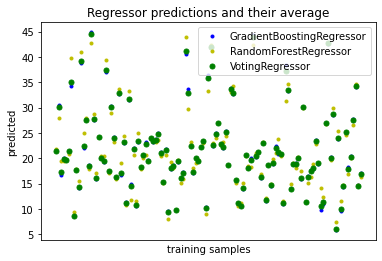

In [36]:
plt.figure()
plt.plot(gb_prediction_test,".b", label="GradientBoostingRegressor")
plt.plot(rf_prediction_test,".y", label="RandomForestRegressor")
plt.plot(voting_prediction_test,".g", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")


Gut erkennbar, dass die Voting Regression als Durchschnitt aus beiden Methoden funktioniert, wobei das maximale Gewicht auf GB gelegt wird.

Generiere die Graphen für alle drei Modelle, um die Trainingsperformance zu visualisieren:  

<function matplotlib.pyplot.show(close=None, block=None)>

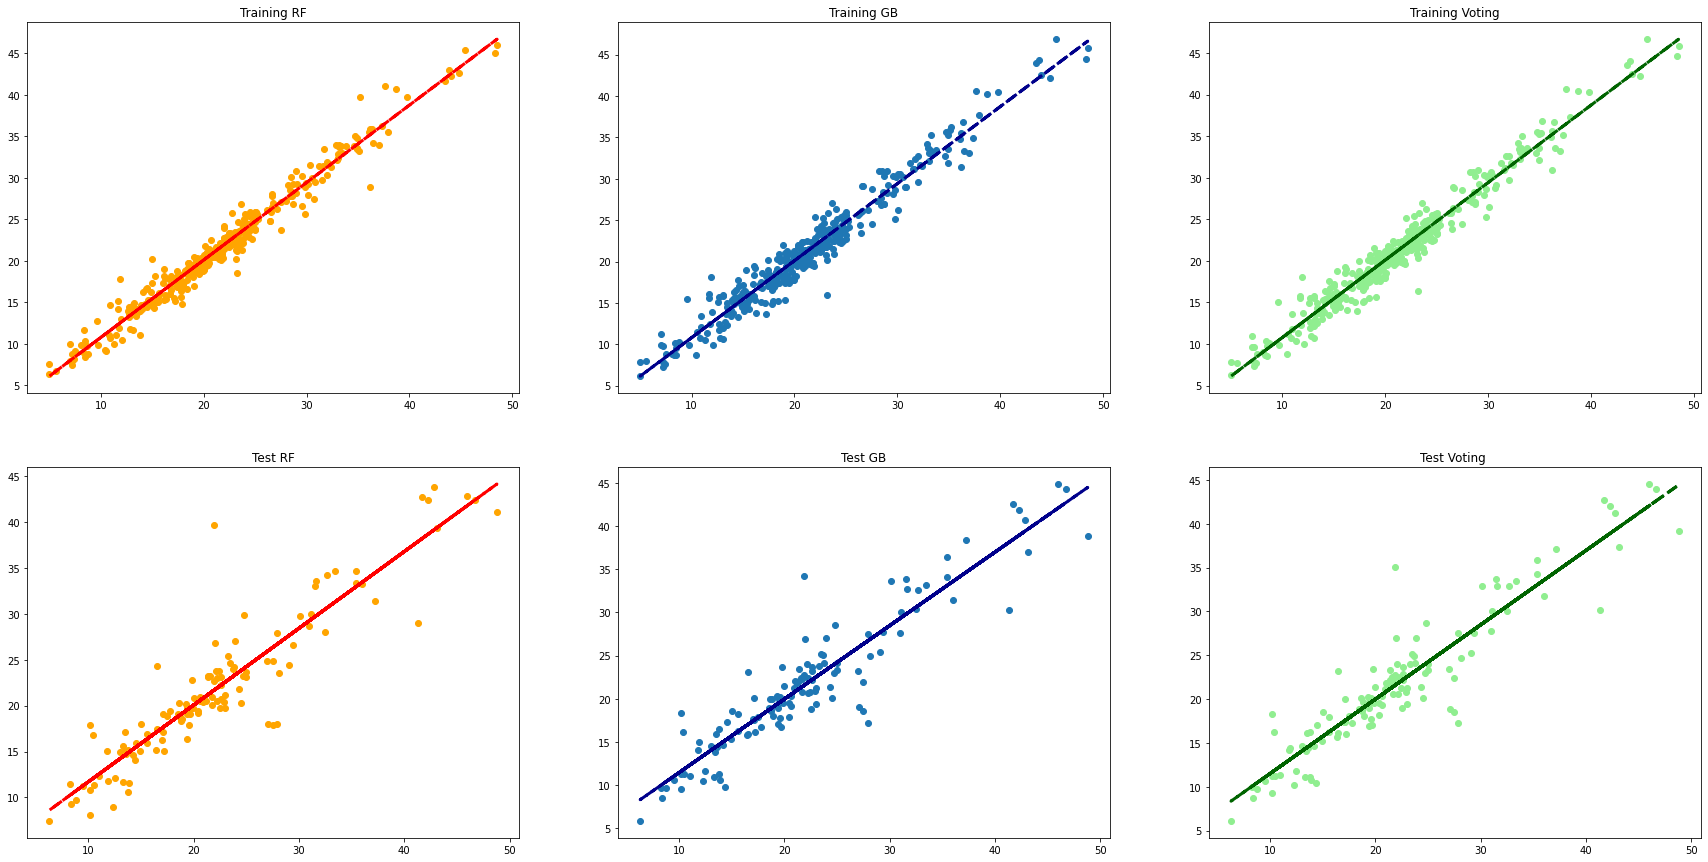

In [37]:
#show the results as 3x2 subplots
import matplotlib.pyplot as plt
figure, axis = plt.subplots(ncols=3,nrows=2, figsize=(30, 15))

z_rf_train = np.polyfit(y_train, rf_prediction_train, 1)
p_rf_train = np.poly1d(z_rf_train)

axis[0,0].scatter(y_train, rf_prediction_train, color = "orange")
axis[0,0].plot(y_train,p_rf_train(y_train), color="red",linewidth=3, linestyle="--")
axis[0,0].set_title("Training RF")

z_gb_train = np.polyfit(y_train, gb_prediction_train, 1)
p_gb_train = np.poly1d(z_gb_train)
axis[0,1].scatter(y_train, gb_prediction_train)
axis[0,1].plot(y_train,p_gb_train(y_train), color="darkblue",linewidth=3, linestyle="--")
axis[0,1].set_title("Training GB")

z_voting_train = np.polyfit(y_train, voting_prediction_train, 1)
p_voting_train = np.poly1d(z_voting_train)
axis[0,2].scatter(y_train, voting_prediction_train, color = "lightgreen")
axis[0,2].plot(y_train,p_voting_train(y_train), color="darkgreen",linewidth=3, linestyle="--")
axis[0,2].set_title("Training Voting")

z_rf_test = np.polyfit(y_test, rf_prediction_test, 1)
p_rf_test = np.poly1d(z_rf_test)
axis[1,0].scatter(y_test, rf_prediction_test, color = "orange")
axis[1,0].plot(y_test,p_rf_test(y_test), color="red",linewidth=3, linestyle="--")
axis[1,0].set_title("Test RF")

z_gb_test = np.polyfit(y_test, gb_prediction_test, 1)
p_gb_test = np.poly1d(z_gb_test)
axis[1,1].scatter(y_test, gb_prediction_test)
axis[1,1].plot(y_test,p_gb_test(y_test), color="darkblue",linewidth=3, linestyle="--")
axis[1,1].set_title("Test GB")

z_voting_test = np.polyfit(y_test, voting_prediction_test, 1)
p_voting_test = np.poly1d(z_voting_test)
axis[1,2].scatter(y_test, voting_prediction_test, color = "lightgreen")
axis[1,2].plot(y_test,p_voting_test(y_test), color="darkgreen",linewidth=3, linestyle="--")
axis[1,2].set_title("Test Voting ")

plt.show


### Step9: Statische Evaluation der Ergebnisse

Alle Modelle werden 150 mal verwendet und die Gütemaße zu R", RMSE und dem R2 der 10-fachen Kreuzvalidierung gespeichert. Basierend dieser Daten lassen sich Mittelwerte berechnen, um die Performance der Modelle auf Signifikanz zu überprüfen. Dazu wird für alle Gütemaße ein F-Test (ANOVA) angewendet für die gemeinsame Signifikanz. Anschließend werden alle Kombinationen mithilfe eines zweiseitigen t-Tests auf einzelne Signifikanz verglichen. Sollten die p-Werte signifikant sein, ist dies ein Indiz dafür, dass die Leistung der Modelle sich bedeutent unterscheidet und damit kann beurteilt werden, welche Modelle andere Modelle outperformed haben.

### R2

In [38]:
'''Vergleich des R2 um zu ermitteln, welches Modell den höchsten Score im Training erreicht hat im Schnitt.'''

r2_train_rf = []
r2_train_gb = []
r2_train_voting = []

n = 150

#set an random state to reproduce the data 
while n != 0:

    rf_model = rf_regressor.fit(X_train,y_train)
    rf_prediction_train = rf_model.predict(X_train)
    rf_r_square_train = metrics.r2_score(y_train, rf_prediction_train)

    gb_model = gb_regressor.fit(X_train,y_train)
    gb_prediction_train = gb_model.predict(X_train)
    gb_r_square_train = metrics.r2_score(y_train, gb_prediction_train)

    voting_model = VOTING_regressor.fit(X_train, y_train)
    voting_prediction_train = voting_model.predict(X_train)
    voting_r_square_train = metrics.r2_score(y_train, voting_prediction_train)

    r2_train_rf.append(rf_r_square_train)
    r2_train_gb.append(gb_r_square_train)
    r2_train_voting.append(voting_r_square_train)

    n -= 1




In [39]:
import scipy.stats as stats
'''
Führen Sie eine einseitige ANOVA durch.

Die einseitige ANOVA testet die Nullhypothese, dass zwei oder mehr Gruppen denselben Populationsmittelwert haben. 
Der Test wird auf Stichproben aus zwei oder mehr Gruppen angewandt, die sich möglicherweise in ihrer Größe unterscheiden.
'''
stats.f_oneway(np.hstack(r2_train_rf),np.hstack(r2_train_gb), np.hstack(r2_train_voting))

F_onewayResult(statistic=399734.30598011997, pvalue=0.0)

R2 im Training gemeinsam signifikant: Also gibt es Unterschiede zwischen mindestens zwei Modellen. Nun erfolgt die einzelnen Gegenüberstellungen mit dem t-Test.

In [40]:
import scipy.stats as stats
'''
Mittelwertvergleich für alle Kombinationen der drei Modelle
'''
print(stats.ttest_ind(a=np.hstack(r2_train_rf), b=np.hstack(r2_train_gb), equal_var=True))
print(stats.ttest_ind(a=np.hstack(r2_train_rf), b=np.hstack(r2_train_voting), equal_var=True))
print(stats.ttest_ind(a=np.hstack(r2_train_voting), b=np.hstack(r2_train_gb), equal_var=True))

print("Mittelwert für RF R2 nach 150 Iterationen: ", np.asarray(r2_train_rf).mean())
print("Standardabweichung für RF R2 nach 150 Iterationen: ", np.asarray(r2_train_rf).std())

print("Mittelwert für GB R2 nach 150 Iterationen: ", np.asarray(r2_train_gb).mean())
print("Standardabweichung für GB R2 nach 150 Iterationen: ", np.asarray(r2_train_gb).std())

print("Mittelwert für Voting R2 nach 150 Iterationen: ", np.asarray(r2_train_voting).mean())
print("Standardabweichung für Voting R2 nach 150 Iterationen: ", np.asarray(r2_train_voting).std())



Ttest_indResult(statistic=723.7479384282123, pvalue=0.0)
Ttest_indResult(statistic=490.14841101245804, pvalue=0.0)
Ttest_indResult(statistic=1341.6475489902798, pvalue=0.0)
Mittelwert für RF R2 nach 150 Iterationen:  0.9672823775807353
Standardabweichung für RF R2 nach 150 Iterationen:  0.0002621310273856228
Mittelwert für GB R2 nach 150 Iterationen:  0.951740172503336
Standardabweichung für GB R2 nach 150 Iterationen:  1.570092458683775e-17
Mittelwert für Voting R2 nach 150 Iterationen:  0.9566074865596061
Standardabweichung für Voting R2 nach 150 Iterationen:  4.428371651840929e-05


- Ttest_indResult(statistic=710.9884197816351, pvalue=0.0)
- Ttest_indResult(statistic=481.9705958227159, pvalue=0.0)

- Ttest_indResult(statistic=1504.9225789449936, pvalue=0.0)
- Mittelwert für RF R2 nach 150 Iterationen:  0.96722499317103

- Standardabweichung für RF R2 nach 150 Iterationen:  0.00026585007493922533
- Mittelwert für GB R2 nach 150 Iterationen:  0.951740172503336

- Standardabweichung für GB R2 nach 150 Iterationen:  0.0
- Mittelwert für Voting R2 nach 150 Iterationen:  0.9566126612849046

- Standardabweichung für Voting R2 nach 150 Iterationen:  3.952117280408629e-05

- F_onewayResult(statistic=387919.61732858367, pvalue=0.0)


Nach diesen Ergebnissen hat RF das höchse R2 im Training erzielt. Da alle t-test mit RF signifikant sind, kann man annehmen, dass im Training das RF die beste Leistung erzielt hat.

### RMSE

In [41]:
'''Vergleich des RMSE um zu ermitteln, welches Modell die geringsten Fehler gemacht hat im Schnitt.'''

rmse_train_rf = []
rmse_train_gb = []
rmse_train_voting = []

n = 150

#set an random state to reproduce the data 
while n != 0:

    rf_model = rf_regressor.fit(X_train,y_train)
    rf_prediction_train = rf_model.predict(X_train)
    rf_rmse_train = metrics.mean_squared_error(y_train, rf_prediction_train, squared=False)

    gb_model = gb_regressor.fit(X_train,y_train)
    gb_prediction_train = gb_model.predict(X_train)
    gb_rmse_train = metrics.mean_squared_error(y_train, gb_prediction_train, squared=False)

    voting_model = VOTING_regressor.fit(X_train, y_train)
    voting_prediction_train = voting_model.predict(X_train)
    voting_rmse_train = metrics.mean_squared_error(y_train, voting_prediction_train, squared=False)

    rmse_train_rf.append(rf_rmse_train)
    rmse_train_gb.append(gb_rmse_train)
    rmse_train_voting.append(voting_rmse_train)

    n -= 1




In [42]:
import scipy.stats as stats
'''
Führen Sie eine einseitige ANOVA durch.

Die einseitige ANOVA testet die Nullhypothese, dass zwei oder mehr Gruppen denselben Populationsmittelwert haben. 
Der Test wird auf Stichproben aus zwei oder mehr Gruppen angewandt, die sich möglicherweise in ihrer Größe unterscheiden.
'''
stats.f_oneway(np.hstack(rmse_train_rf),np.hstack(rmse_train_gb), np.hstack(rmse_train_voting))

F_onewayResult(statistic=304771.03052446316, pvalue=0.0)

RMSE im Training gemeinsam signifikant: Also gibt es Unterschiede zwischen mindestens zwei Modellen. Nun erfolgt die einzelnen Gegenüberstellungen mit dem t-Test.

In [43]:
import scipy.stats as stats
'''
Mittelwertvergleich für alle Kombinationen der drei Modelle
'''
print(stats.ttest_ind(a=np.hstack(rmse_train_rf), b=np.hstack(rmse_train_gb), equal_var=True))
print(stats.ttest_ind(a=np.hstack(rmse_train_rf), b=np.hstack(rmse_train_voting), equal_var=True))
print(stats.ttest_ind(a=np.hstack(rmse_train_voting), b=np.hstack(rmse_train_gb), equal_var=True))

print("Mittelwert für RF RMSE nach 150 Iterationen: ", np.asarray(rmse_train_rf).mean())
print("Standardabweichung für RF RMSE nach 150 Iterationen: ", np.asarray(rmse_train_rf).std())

print("Mittelwert für GB RMSE nach 150 Iterationen: ", np.asarray(rmse_train_gb).mean())
print("Standardabweichung für GB RMSE nach 150 Iterationen: ", np.asarray(rmse_train_gb).std())

print("Mittelwert für Voting RMSE nach 150 Iterationen: ", np.asarray(rmse_train_voting).mean())
print("Standardabweichung für Voting RMSE nach 150 Iterationen: ", np.asarray(rmse_train_voting).std())



Ttest_indResult(statistic=-626.286880519053, pvalue=0.0)
Ttest_indResult(statistic=-437.54974067817284, pvalue=0.0)
Ttest_indResult(statistic=-1319.2317552469372, pvalue=0.0)
Mittelwert für RF RMSE nach 150 Iterationen:  1.3641435749412356
Standardabweichung für RF RMSE nach 150 Iterationen:  0.005667263915162581
Mittelwert für GB RMSE nach 150 Iterationen:  1.654916267110879
Standardabweichung für GB RMSE nach 150 Iterationen:  4.216899284054218e-16
Mittelwert für Voting RMSE nach 150 Iterationen:  1.5692659506416962
Standardabweichung für Voting RMSE nach 150 Iterationen:  0.0007925031726442746


- Ttest_indResult(statistic=-641.7865880192455, pvalue=0.0)
- Ttest_indResult(statistic=-448.9876073146283, pvalue=0.0)
- Ttest_indResult(statistic=-1460.8483549279074, pvalue=0.0)

- Mittelwert für RF RMSE nach 150 Iterationen:  1.363775900910633
- Standardabweichung für RF RMSE nach 150 Iterationen:  0.0055373875651976235

- Mittelwert für GB RMSE nach 150 Iterationen:  1.654916267110879
- Standardabweichung für GB RMSE nach 150 Iterationen:  3.9968028886505636e-16

- Mittelwert für Voting RMSE nach 150 Iterationen:  1.5691533808715463
- Standardabweichung für Voting RMSE nach 150 Iterationen:  0.0007166174621170176
  
- F_onewayResult(statistic=320924.05858762475, pvalue=0.0)

Nach diesen Befunden hat das RF die geringsten Fehler im Schnitt aufgezeigt. Da alle t-test mit RF signifikant sind, kann man annehmen, dass im Training das RF die beste Leistung erzielt hat.

### Cross Validation mit R2

Der gleiche Prozess soll mit der kreuzvalidierung wiederholt werden. Dadurch lässt sich beurteilen, inwiefern die Modelle generalisirbar anwendbar sind. 

In [ ]:
'''Vergleich des Cross-Validation Score um zu ermitteln, welches Modell stärker overfittet.'''

cross_val_rf = []
cross_val_gb = []
cross_val_voting = []


n = 150

#set an random state to reproduce the data 
while n != 0: 
    rf_cv = cross_val_score(estimator = rf_regressor, scoring = "neg_root_mean_squared_error" , X = X, y = Y.ravel(), cv = kf)
    gb_cv = cross_val_score(estimator = gb_regressor, scoring = "neg_root_mean_squared_error", X = X, y = Y.ravel(), cv = kf)
    voting_cv = cross_val_score(estimator = VOTING_regressor, scoring = "neg_root_mean_squared_error", X = X, y = Y.ravel(), cv = kf)

    cross_val_rf.append(rf_cv)
    cross_val_gb.append(gb_cv)
    cross_val_voting.append(voting_cv)

In [45]:
import scipy.stats as stats
'''
Führen Sie eine einseitige ANOVA durch.

Die einseitige ANOVA testet die Nullhypothese, dass zwei oder mehr Gruppen denselben Populationsmittelwert haben. 
Der Test wird auf Stichproben aus zwei oder mehr Gruppen angewandt, die sich möglicherweise in ihrer Größe unterscheiden.
'''

stats.f_oneway(np.hstack(cross_val_rf),np.hstack(cross_val_gb), np.hstack(cross_val_voting))

F_onewayResult(statistic=16.0129604836694, pvalue=1.1757250195297228e-07)

R2 der 10-fachen Kreuzvalidierung im Training gemeinsam signifikant: Also gibt es Unterschiede zwischen mindestens zwei Modellen. Nun erfolgt die einzelnen Gegenüberstellungen mit dem t-Test.

In [46]:
import scipy.stats as stats

'''
Mittelwertvergleich für alle Kombinationen der drei Modelle
'''
print(stats.ttest_ind(a=np.hstack(cross_val_gb), b=np.hstack(cross_val_rf), equal_var=True))
print(stats.ttest_ind(a=np.hstack(cross_val_voting), b=np.hstack(cross_val_rf), equal_var=True))
print(stats.ttest_ind(a=np.hstack(cross_val_voting), b=np.hstack(cross_val_gb), equal_var=True))

print("Mittelwert für RF Cross validation nach 150 Iterationen: ", np.asarray(cross_val_rf).mean())
print("Standardabweichung für RF Cross validation nach 150 Iterationen: ", np.asarray(cross_val_rf).std())

print("Mittelwert für GB Cross validation nach 150 Iterationen: ", np.asarray(cross_val_gb).mean())
print("Standardabweichung für GB Cross validation nach 150 Iterationen: ", np.asarray(cross_val_gb).std())

print("Mittelwert für Voting Cross validation nach 150 Iterationen: ", np.asarray(cross_val_voting).mean())
print("Standardabweichung für Voting Cross validation nach 150 Iterationen: ", np.asarray(cross_val_voting).std())


Ttest_indResult(statistic=4.343205066035054, pvalue=1.450758656672275e-05)
Ttest_indResult(statistic=5.045749588494673, pvalue=4.786810624889858e-07)
Ttest_indResult(statistic=0.9380705032305036, pvalue=0.3482837436203776)
Mittelwert für RF Cross validation nach 150 Iterationen:  0.8485658638630588
Standardabweichung für RF Cross validation nach 150 Iterationen:  0.06749048331109071
Mittelwert für GB Cross validation nach 150 Iterationen:  0.8582903746801757
Standardabweichung für GB Cross validation nach 150 Iterationen:  0.054404213556018835
Mittelwert für Voting Cross validation nach 150 Iterationen:  0.8602312657069561
Standardabweichung für Voting Cross validation nach 150 Iterationen:  0.058797920035125725


Es unterscheiden sich die Mittelwerte zwischen (RF und GB) und (RF und Vote) signifikant auf dem 1%-Niveau. 

- Ttest_indResult(statistic=4.343205066035054, pvalue=1.450758656672275e-05)
- Ttest_indResult(statistic=5.045749588494673, pvalue=4.786810624889858e-07)
- Ttest_indResult(statistic=0.9380705032305036, pvalue=0.3482837436203776)

- Mittelwert für RF Cross validation nach 150 Iterationen:  0.8485658638630588
- Standardabweichung für RF Cross validation nach 150 Iterationen:  0.06749048331109071
  
- Mittelwert für GB Cross validation nach 150 Iterationen:  0.8582903746801757
- Standardabweichung für GB Cross validation nach 150 Iterationen:  0.054404213556018835
  
- Mittelwert für Voting Cross validation nach 150 Iterationen:  0.8602312657069561
- Standardabweichung für Voting Cross validation nach 150 Iterationen:  0.058797920035125725
  
- F_onewayResult(statistic=13.251293551713479, pvalue=1.8277977095181198e-06)

Allerdings konnte kein signifikanter Unterschied zwischen Vote und GB ermittelt werden. Da sich das Vote-Modell allerdings aus einem gewichteten Verhältnis aus 5:1 für GB zusammensetzt, ist dies nicht verwunderlich. Es ist anzunehmen, dass neben der Hybridregression das GB-Modell auch die höhrere Punktzahl erzielt hat und dementsprechend weniger overfittet als RF. 

### Step 10. Conclusion

Random Forest: 
- Bester Score für das Training.
- Für Testdaten bzw. der Kreuzvaliderung zeigt es die schlechteste Wahl: overfitting am stärksten ausgeprägt. 

Gradient Boosting: 
- Performt im Training am schlechtesten.
- Bessere Leistung für Testdaten als Random Forest, dennoch schneidet die Hybridregression noch besser ab.

Voting Regression: 
- Belegt im Training Platz 2.
- Kreuzvalidierung und Testdaten wird im Vergleich zu RF und GB die beste Leistung erzielt.

### Durch diese Befunde wird die Voting Regression gegebnüber den beiden homogenen Schätzern bevorzugt, da sich Stärken und Schwächen der einzelnen Modelle im Hybridmodell modifiziert werden und im Schnitt die beste Punktzahl für Testdaten erzielt werden konnte. 